# Introduction to Descriptive Statistics
Adapted from *COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

In this lecture, we'll cover 
- variable types 
- descriptive statistics in python (min, max, mean, median, std, var, histograms, quantiles) 
- correlation vs causation
- confounding variables 
- descriptive vs. inferential statistics
- discrete and continuous random variables (e.g.: Bernouilli, Binomial, Normal)

## Variable types
- **discrete variables**: values are discrete (e.g., year born, T/F)
- **continuous variables**: values are real numbers (e.g., length)

## Levels of measurement
- **Categorical**: Unordered variables 
- **Ordinal**: There is an ordering but no implication of equal distance between the different points of the scale. 
- **Interval**: There are equal differences between successive points on the scale but the position of zero is arbitrary. 
- **Ratio**: The relative magnitudes of scores and the differences between them matter. The position of zero is fixed. 

## Categorical variables
Unordered variables 

Examples: 
- Survey responses: sex (M/F), true or false (T/F), yes or no (Y/N) 
- size: S/M/L/XL 
- color: red, blue, green, etc.


## Ordinal Variables
There is an ordering but no implication of equal distance between the different points of the scale. 


Examples:
- educational level (high school, some college, degree, graduate…) 
- on Likert scale of 1 to 5, how satisfied are you with your instructor? 
- social class (lower, middle, upper) 

<img src="OrdinalVariables.png"/>


## Interval Variables 
There are equal differences between successive points on the scale but the position of zero is arbitrary.

Examples:
- Measurement of temperature using the Celsius or Fahrenheit scales.
- Longitude 

![Thermometers](Thermometer_CF.png)


## Ratio Variables
The relative magnitudes of scores and the differences between them matter. The position of zero is fixed.

Examples:
- Absolute measure of temperature (Kelvin scale) 
- Age
- Weight
- Length

<img src="Ruler.png" width="50%"  alt="https://commons.wikimedia.org/wiki/File:Metre_pliant_500px.png"/>


## Quiz!

For each of the following variables, what is the variable type (discrete vs. continuous) and level of measurement (categorical, ordinal, interval, or ratio)?</br>
类别型（categorical）、顺序型（ordinal）、区间型（interval）、比率型（ratio）。</br>
	•	离散变量（Discrete）：</br>
		只能取特定的、可数的值（通常是整数）。例如：人数（1, 2, 3…）、考试成绩中的正确题数、骰子的点数。不能取中间值，比如“2.5个人”没有意义。</br>
	•	连续变量（Continuous）：</br>
		可以在一个区间内取任意值（包括小数）。例如：身高（170.2 cm）、体重（65.5 kg）、时间（3.14 秒）。可以有无限多的可能值，数值之间可以无限细分。</br>

1. Lattitude
2. Olympic 50 meter race times
3. Olympic floor gymnastics score
4. College major
6. Amazon rating for a product

Can you think of another example of an interval variable? 



<img src="purity.png" width="90%"  alt="https://xkcd.com/435/"/>


## Descriptive Statistics

The goal is to describe a dataset with a small number of statistics or figures  

Suppose we are given a sample, $x_1, x_2, \ldots, x_n$ of real values 

Some *descriptive statitsics* for this data are the min, max, median, and mean, $\frac{1}{n} \sum_{i=1}^n x_i$

How do we compute these using python? 


In [2]:
# First import python packages
# pip3 install numpy matplotlib
#- `numpy`：数值计算库，主要用于处理数组。
#- `matplotlib`：数据可视化库，生成图表。
#- `pandas`：处理表格数据（比如 CSV 文件），类似 Excel 的操作。
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# - 让图表在 Notebook 中直接显示，而不是弹出新窗口。
%matplotlib inline 
#设置和读取绘图的默认样式参数（rc = “run commands” 的缩写）plt.rcParams 是一个 全局变量（Global Variable）它的类型是 字典（dict）存储着所有绘图默认设置。        
plt.rcParams['figure.figsize'] = (10, 6)  #设置默认图像尺寸为 10 英寸宽，6 英寸高
#plt.rcParams['figure.figsize'] = [10, 6]  # ✅ 列表也可以，但推荐用元组
#plt.rcParams['figure.figsize'] = {10, 6}  # ❌ 错误：这是一个 set 集合，不是元组，集合是无序的，不能保证是先宽后高
plt.style.use('ggplot')    # R 语言 `ggplot2` 风格的主题


print(plt.rcParams.keys())

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#E5E5E5',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': True,
          'axes.grid.axis': 'bo

## Alta monthly average snowfall, October - April
compiled using data from 1980 to 2014 <br>
https://www.alta.com/conditions/weather-observations/snowfall-history

In [ ]:
import numpy as np

a = np.array([1, 2.5, 3])
print(a)                  # [1.  2.5 3. ]
print(a.dtype)            # float64 （所有都转成了 float）numpy.array 中的元素推荐类型相同

In [3]:
Alta_avg_month_snow = np.array([28.50,76.77,92.00,95.40,90.85,99.66,80.00])

# this is a list of floats
print(type(Alta_avg_month_snow))
print(type(Alta_avg_month_snow[0]))

<class 'numpy.ndarray'>
<class 'numpy.float64'>


In [4]:
# how many months data do we have?
len(Alta_avg_month_snow)

7

In [5]:
print(sum(Alta_avg_month_snow)/len(Alta_avg_month_snow))
print(Alta_avg_month_snow.mean())
np.mean(Alta_avg_month_snow)

80.4542857142857
80.4542857142857


np.float64(80.4542857142857)

Numpy has methods for many basic statistics and other functions that work on "list-like" things

In [41]:
# compute the min and max
np.min(Alta_avg_month_snow),np.max(Alta_avg_month_snow)

(28.5, 99.66)

In [42]:
# what month do these correspond to? 
imin = np.argmin(Alta_avg_month_snow)
imax = np.argmax(Alta_avg_month_snow)
months = ['Oct','Nov','Dec','Jan','Feb','March','Apr']
print(months[imin], months[imax])
print(Alta_avg_month_snow[imin], Alta_avg_month_snow[imax])

Oct March
28.5 99.66


In [44]:
# compute the mean
print(np.mean(Alta_avg_month_snow))
print(np.std(Alta_avg_month_snow))

80.4542857142857
22.509161218835104


In [43]:
# compute the median
np.median(Alta_avg_month_snow)

90.85

## Data from the 1994 census

import data from the following dataset <br>
https://archive.ics.uci.edu/ml/datasets/Adult

In [5]:
# use pandas to import a table of data from a website
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", sep=",", 
                  names=("age", "type_employer", "fnlwgt", "education", "education_num", "marital", 
                         "occupation", "relationship", "race","sex","capital_gain", "capital_loss", 
                         "hr_per_week","country", "income"))
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [6]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hr_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
type(data)      #series
#type(data["age"])

pandas.core.frame.DataFrame

In [49]:
data["age"].head()

0    39
1    50
2    38
3    53
4    28
Name: age, dtype: int64

In [9]:
# export a list containing ages of people in 1994 Census
ages = data["age"].tolist()
ages
# type(ages)   list

[39,
 50,
 38,
 53,
 28,
 37,
 49,
 52,
 31,
 42,
 37,
 30,
 23,
 32,
 40,
 34,
 25,
 32,
 38,
 43,
 40,
 54,
 35,
 43,
 59,
 56,
 19,
 54,
 39,
 49,
 23,
 20,
 45,
 30,
 22,
 48,
 21,
 19,
 31,
 48,
 31,
 53,
 24,
 49,
 25,
 57,
 53,
 44,
 41,
 29,
 25,
 18,
 47,
 50,
 47,
 43,
 46,
 35,
 41,
 30,
 30,
 32,
 48,
 42,
 29,
 36,
 28,
 53,
 49,
 25,
 19,
 31,
 29,
 23,
 79,
 27,
 40,
 67,
 18,
 31,
 18,
 52,
 46,
 59,
 44,
 53,
 49,
 33,
 30,
 43,
 57,
 37,
 28,
 30,
 34,
 29,
 48,
 37,
 48,
 32,
 76,
 44,
 47,
 20,
 29,
 32,
 17,
 30,
 31,
 42,
 24,
 38,
 56,
 28,
 36,
 53,
 56,
 49,
 55,
 22,
 21,
 40,
 30,
 29,
 19,
 47,
 20,
 31,
 35,
 39,
 28,
 24,
 38,
 37,
 46,
 38,
 43,
 27,
 20,
 49,
 61,
 27,
 19,
 45,
 70,
 31,
 22,
 36,
 64,
 43,
 47,
 34,
 33,
 21,
 52,
 48,
 23,
 71,
 29,
 42,
 68,
 25,
 44,
 28,
 45,
 36,
 39,
 46,
 18,
 66,
 27,
 28,
 51,
 27,
 28,
 27,
 21,
 34,
 18,
 33,
 44,
 43,
 30,
 40,
 37,
 34,
 41,
 53,
 31,
 58,
 38,
 24,
 41,
 47,
 41,
 23,
 36,
 40,
 35,
 24,


In [56]:
print(len(ages))
print(np.min(ages))
print(np.max(ages))
print(np.mean(ages))
print(np.median(ages))

32561
17
90
38.58164675532078
37.0


In [14]:
print(len(data["age"]))
print(np.min(data["age"]))
print(np.max(data["age"]))
print(np.mean(data["age"]))
print(np.median(data["age"]))

32561
17
90
38.58164675532078
37.0


# Quantiles 
Quantiles describe what percentage of the observations in a sample have smaller value


In [57]:
np.percentile(ages,25), np.percentile(ages,75)

(28.0, 48.0)

For this data, 25% of the people are under 28 years old

The middle 50% of the data (the data between the 25% and 75% quantiles) is between 28 and 48 years old 

**Question**: how do I read off quantiles from a histogram? 

# Variance and Standard Deviation

Variance and standard deviation quantify the amount of variation or dispersion of a set of data values.

Mean, $\mu = \frac{1}{n} \sum_{i = 1}^n x_i$ <br>
Variance $= \sigma^2   = \frac{1}{n} \sum_{i = 1}^n (x_i - \mu)^2$ <br>
Std. dev. $= \sigma$

The variance can also be computed by the "mean of x-squared" - $\mu^2$</br>
	方差常用于损失函数（比如 MSE：Mean Squared Error），对偏离惩罚更大（平方放大了异常值的影响）便于数学推导</br>
    	平均工资 = 8300 元</br>
	•	如果 标准差 = 200 元：说明大家的工资大多在 8300 ± 200（即 8100～8500）元之间</br>
	•	如果 方差 = 40,000 元²：虽然正确，但人不容易理解“工资的平方差是4万”到底代表啥</br>



In [58]:
print(np.var(ages))
print(np.std(ages))
print(np.std(ages)**2)

186.05568600783081
13.640223092304275
186.05568600783081


In terms of the histogram,...
<img src="SmallLargeStandDev.png" width="50%"  alt="https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg">



## Covariance and Correlation
Covariance and correlation measure of how much two variables change together.

$cov(x,y) = \frac{1}{n} \sum_{i=1}^n (x_i - \mu_x)(y_i - \mu_y)$ 

$\mu_x$ is mean of $x_1,x_2,\ldots,x_n$ <br>
$\mu_y$ is mean of $y_1,y_2,\ldots,y_n$

$corr(x,y) = \frac{cov(X,Y)}{\sigma_x \sigma_y}$

$\sigma_x$ is std. dev. of $x_1,x_2,\ldots,x_n$ <br>
$\sigma_y$ is std. dev. of $y_1,y_2,\ldots,y_n$

Correlations for various pairs of variables:
<img src="Correlation_examples2.svg" width="90%"  alt="https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg">

 <br>
协方差衡量的是 两个变量如何一起变化： <br>
	•	如果 x 增大时 y 也增大，→ 协方差为正 <br>
	•	如果 x 增大时 y 反而减小，→ 协方差为负 <br>
	•	如果 x 和 y 没有线性关系，→ 协方差接近 0 <br>
相关系数是 标准化后的协方差，范围在 [-1, 1] 之间： <br>
	•	+1 表示完全正相关 <br>
	•	0 表示无线性关系 <br>
	•	-1 表示完全负相关 <br>

协方差：告诉你两个变量是一起升、一起降，还是反方向走； <br>
相关系数：告诉你这种关系有多强，而且是标准化后的结果，便于比较。 <br>





## Correlation vs Causation

<img src="correlation.png" width="100%"  alt="https://xkcd.com/552/">
</br>
Correlation（相关）不代表 Causation（因果）。</br>
什么是 Correlation（相关性）？定义： 两个变量一起变化的趋势。</br>
比如：</br>
	•	气温升高时，冰淇淋销量上升 👉 正相关。</br>
	•	身高增加时，体重可能增加 👉 正相关。</br>
相关只是说明 变量之间有某种线性（或非线性）关系，但并不表示一个导致了另一个。</br>
什么是 Causation（因果关系）？定义： 一个变量的变化 直接引起 另一个变量的变化。</br>
比如：</br>
	•	抽烟 → 肺癌：抽烟是肺癌的已知诱因。</br>
	•	服用退烧药 → 体温下降：退烧药“引起”体温下降。</br>





## Spurious Correlations I (www.tylervigen.com)

<img src="Conf1.png" width="100%"  alt="www.tylervigen.com">



## Spurious Correlations II (www.tylervigen.com)

<img src="Conf2.png" width="100%" alt="www.tylervigen.com">


## Confounding: example

Suppose we are given city statistics covering a four-month summer period, and observe that swimming pool deaths tend to increase on days when more ice cream is sold. 

Should we conclude that ice cream is the killer? 

## Confounding: example cont.

No! 

As astute analysts, we identify average daily temperature as a confounding variable: on hotter days, people are more likely to both buy ice cream and visit swimming pools. 

Regression methods can be used to statistically control for this confounding variable, eliminating the direct relationship between ice cream sales and swimming pool deaths.

<br> <br> <br> <br> 
source: doi:10.1371/journal.pone.0152719  <br> 
“相关”不等于“因果”，很多时候是因为有隐藏的第三变量（混杂变量）在影响结果。<br> 
使用回归模型，可以控制这些变量，找到真正的因果关系。<br> 
多元线性回归可以帮我们统计上控制住气温这个变量，这样我们就可以看清楚： <br> 

“在气温不变的情况下，冰淇淋销量对溺水人数有没有影响？” <br> 

举个模型例子： <br> 

\text{溺水人数} = \beta_0 + \beta_1 \cdot \text{冰淇淋销量} + \beta_2 \cdot \text{气温} + \varepsilon <br> 

解释： <br> 
	•	如果加入气温后，冰淇淋的系数（β₁）变得不显著： <br> 
	•	✅ 表示：冰淇淋本身并不导致溺水 <br> 
	•	如果气温的系数（β₂）显著： <br> 
	•	✅ 表示：气温才是影响溺水人数的关键因素


## Descriptive vs. Inferential Statistics 

Descriptive statistics quantitatively describe or summarize features of a dataset. 

Inferential statistics attempts to learn about the population from which the data was sampled. 

**Example**: The week before a US presidential election, it is not possible to ask every voting person who they intend to vote for. Instead, a relatively small number of individuals are surveyed. The *hope* is that we can determine the population's preferred candidate from the surveyed results. 

Often, we will model the population as a *probability distribution*. 

*Inferential statistics* is deducing properties of an underlying probability distribution from sampled data. 
推论统计的目标是：从一小部分样本，推测出整个总体的情况。我们通常会用概率分布（比如正态分布、伯努利分布等）来建模“总体”的特征(需要用概率模型)。然后我们从“样本数据”出发，去推断这个分布的参数</br>
描述统计是用来总结和呈现数据的。它只是告诉你“现在这些数据长啥样”，不去推测更多。


## Random Variables
随机变量（Random Variable） 指的是在一个随机事件中，它的取值是可能结果之一。</br>
概率分布告诉你：每个可能结果出现的概率是多少。</br>

A Random variable is a variable whose value is one of the possible outcomes of a random event.  For example, a random variable representing a die roll has possible values 1-6.  A random variable has an associated "probability distribution" which describes the probability of the variable taking on a particular value.  For the die, the probability distribution is basically: `[1 : 1/6, 2: 1/6, 3: 1/6, ... ]` meaning each outcome is equally likely. 
</br>
 离散（Discrete） </br>
	 只能取有限或可数个值 掷骰子（只能是1~6） </br>

 连续（Continuous） </br>
	 可以取无限多个值，通常是一个区间内的实数值 指针转盘的角度（0°~360°之间任意角度）</br>



Random variables can be either discrete or continuous.  A die is an example of a discrete random variable.  A continuous random variable could represent the angle of a spinner on a board game (assuming we care about the angle it lands on rather than whether it lands on "right foot green" or "left hand blue").  Discrete random variables are a bit more intuitive to think about since we can enumerate all the possibiliities, but the math for analyzing them can be a bit more cumbersome.  Continuous RVs are a little bit weird to think about, but we can manipulate them quite nicely with fun, basic calculus!  </br>
连续变量的可能值是无限多个实数（比如 30.0000001, 30.0000000001…），你几乎不可能精确命中某一个值，所以其概率为 0。</br>
正确的方式是考虑一个区间，比如：</br>
“落在 30° 到 45° 之间的概率是多少？”</br>
这个区间的概率是可以计算出的，比如 P(30° <= X <= 45°) = 0.25。</br>
As an example, what's the probability that my random variable for the spinner give me a 30 degree angle?  0!  The probability of any single continuous value is 0, because there are an infinite number of possibilities (when we deal with floating point math, things aren't exactly 0, but are incredibly small!).  For continuous RVs, we have to think about the probablitiy of our value falling within a range (between 30 and 45 degrees) to get something finite.

What do we do with a random variable?  We might take samples (roll the die a few times and collect the resulting values), or we might use the associated probabilitiy distribution to perform some analysis/computation.

## Bernoulli Distribution

The Bernoulli distribution, named after Jacob Bernoulli, is the probability distribution of a random variable which takes the value 1 (success) with probability $p$ and the value 0 (failure) with probability $q=1-p$. 

The Bernoulli distribution with $p=0.5$ (implying $q=0.5$) describes a 'fair' coin toss where 1 and 0  represent "heads" and "tails", respectively. If the coin is unfair, then we would have that $p\neq 0.5$.

We can use python to sample from the Bernoulli probability distribution.</br>
Bernoulli 分布只能用于离散型随机变量(离散的分类变量（categorical variable）)， Bernoulli 分布定义的是一个随机变量只有两个可能的取值：</br>
	•	1：代表“成功”事件，概率为 p</br>
	•	0：代表“失败”事件，概率为 1 - p</br>

In [8]:
import scipy as sc
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import norm

In [9]:
n = 1000;
coin_flips = bernoulli.rvs(p=0.5, size=n)
#rvs 是 random variates 的缩写，意思是 从指定的概率分布中“随机采样”出一组数据。它的作用是生成一组模拟的随机结果（samples），对应这个概率分布。
print(coin_flips)

[1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1
 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1
 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1
 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0
 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1
 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1
 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1
 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0
 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1
 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0
 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0
 0 0 0 0 1 1 1 0 0 1 0 1 

How many heads did we get? We just count the number of 1's. 

In [61]:
print(sum(coin_flips))
print(sum(coin_flips)/n)

492
0.492


What if we flip the coin more times? 

In [62]:
n = 1000000
coin_flips = bernoulli.rvs(p=0.5, size=n)
print(sum(coin_flips)/n)

0.500025


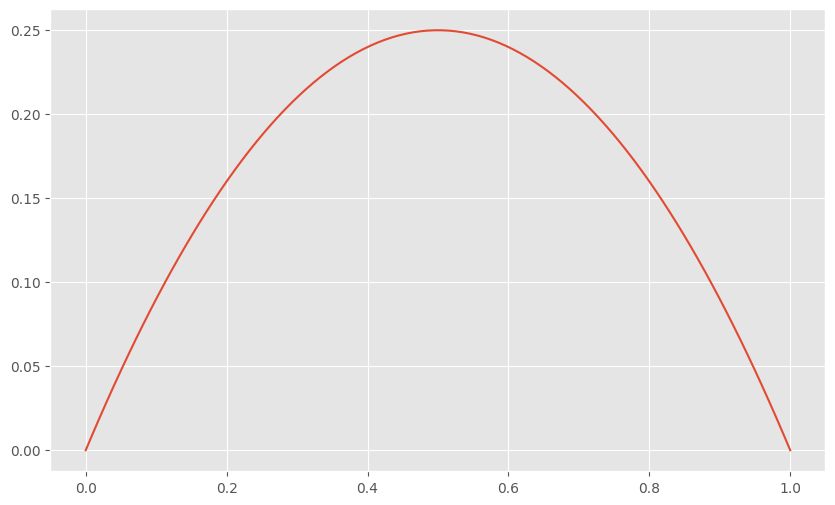

In [66]:
#ps 是一个包含 从 0 到 1 的 100 个概率值
ps = np.linspace(0, 1, 100)
#对每一个概率 $p$，计算它的方差：$p(1 - p)$这样你就得到了一组“不同概率时的方差值”。
vars = ps*(1 - ps)
#把横轴设为概率 $p$，纵轴设为方差 $p(1-p)$，画出来。
plt.plot(ps, vars)
#如果硬币是双面正（永远正面），你每天扔都是一样的，没变化，没意思，方差 = 0
# 如果硬币是公平的，有一半可能正面一半反面，每天结果可能不同，变化大，方差 = 最大


Some facts about Bernoulli variables: 
* mean is p
* variance is p(1-p)</br>
在伯努利分布中，方差是这样算的：</br>

方差 = p * (1 - p)</br>

它表示：这个事件越不确定，方差越大。</br>

比如：</br>
	•	如果你投一个“不公平”的硬币，总是正面（$p = 1$），那就毫无波动，方差 = 0。</br>
	•	如果是“公平”硬币（$p = 0.5$），最不确定（有一半可能正面、一半可能反面），波动最大，方差 = 0.25。

## Binomial distribution二项分布

二项分布是指进行 n 次独立的伯努利试验（Bernoulli Trials）后，成功的次数的概率分布。
eg.重复 1,000,000 次 “投掷一个公平硬币 10 次，并统计出现正面的次数”。这些结果的概率组合就是一个 Binomial(n=10, p=0.5) 分布。


The binomial distribution, with parameters $n$ and $p$, is a **discrete** probability distribution ``summarizing'' the outcome of $n$ Bernoulli random variables. For simplicity, take $p=0.5$ so that the Bernoulli distribution describes the outcome of a coin. For each flip, the probability of heads is $p$ (so the probability of tails is $q=1-p$). But we don't keep track of the individual flips. We only keep track of how many heads/tails there were in total. So, the binomial distribution can be thought of as summarizing a bunch of (independent) Bernoulli random variables. 

The following code is equivalent to flipping a fair (p=0.5) coin n=10 times and counting the number of heads and then repeating this process 1,000,000 times. 

In [67]:
p = 0.5
n = 100
bin_vars = binom.rvs(n=n,p=p,size=1000000)
print(bin_vars[:100])

[43 54 47 52 43 54 46 53 44 50 55 50 45 57 39 55 55 44 55 53 51 49 49 44
 48 42 47 45 54 48 50 54 58 49 44 47 40 55 54 50 52 43 52 50 52 47 62 52
 41 46 52 57 49 55 54 45 51 49 58 51 45 52 55 50 52 55 52 45 55 42 53 50
 56 48 45 43 54 47 55 51 37 42 52 52 52 54 54 53 48 55 49 54 50 49 47 60
 55 52 45 51]


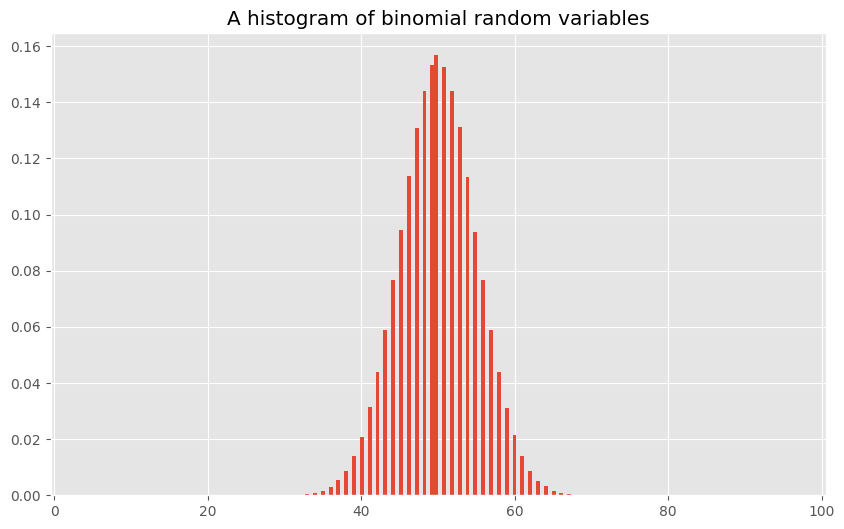

In [68]:
#bins=np.arange(12)-.5
plt.hist(bin_vars, bins = 100,density=True) #density argument makes the y axis probability, not total count
plt.title("A histogram of binomial random variables")
plt.xlim([-0.5,n + .5])
plt.show()

Some facts about the binomial distribution: 
* The mean is $np$
* The variance is $np(1-p)$</br>
Binomial 的意思是你做了 n 次 Bernoulli 实验，每次成功的概率是 p。</br>
你可以把成功总次数 X 拆成：X = X1 + X2 +。。。 + Xn</br>
期望的线性性：</br>
每个 Xi 是一个 Bernoulli(p) 分布的随机变量：每个 x属于{0, 1}</br>
所以它的期望是：E[Xi] = 1 * p + 0 * (1 - p) = p</br>
于是总期望为：E[Xi] = np</br>

只有独立的随机变量，方差才能直接相加：</br>
因为每个 Xi 都是 Bernoulli(p)：</br>
Var(Xi) = p(1 - p)</br>
总共有 n 项：</br>
Var(X) = n * p(1 - p)




## Discrete random variables and probability mass functions 

The Binomial and Bernoulli random variables are examples of *discrete random variables* since they can take only discrete values. A Bernoulli random variable can take values $0$ or $1$. A binomial random variable  can only take values 
$$
0,1,\ldots, n. 
$$
One can compute the probability that the variable takes each value. This is called the *probability mass function*. 
For a Bernoulli random variable, the probability mass function is given by 
$$
f(k) = \begin{cases} p & k=1 \\ 1-p & k = 0 \end{cases}
$$
For a binomial random variable, the probability mass function is given by 
$$
f(k) = \binom{n}{k} p^k (1-p)^{n-k}.
$$
Binomial 分布是n次独立的 Bernoulli 试验
这里的随机变量 k 表示成功（1）的总次数,可能是 0 次、3 次、10 次……。</br>
Here, $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ is the number of ways to arrange the
$k$ heads among the $n$ flips. For a fair coin, we have $p=0.5$ and $f(k) = \binom{n}{k} \frac{1}{2^n}$. This is the number of ways to arrange $k$ heads among $n$ outcomes divided by the total number of outcomes. </br>
k = 0, 1, 2 .... </br>
So basically the PMF is a function takes a possible outcome and returns the probability of sampling that outcome

The probability mass function can be plotted using the matplotlib library as follows.

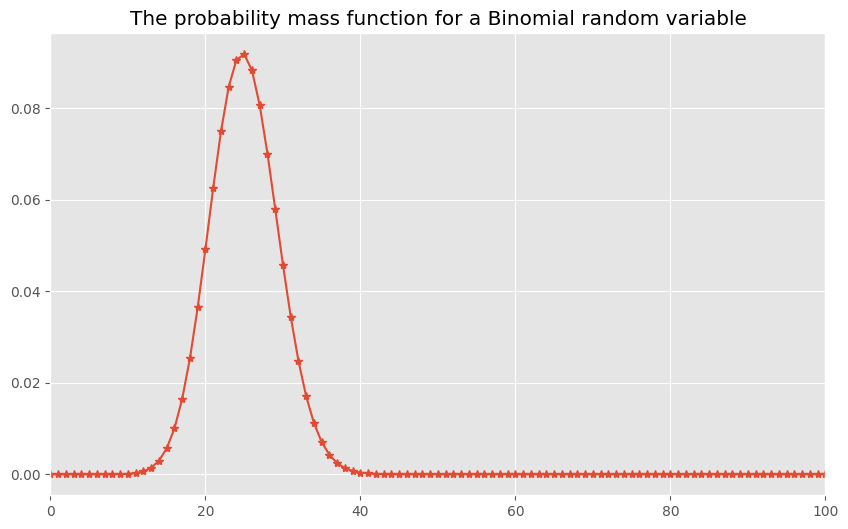

In [69]:
f = lambda k: binom.pmf(k, n=n,p=.25)

x = np.arange(n+1);
plt.plot(x, f(x),'*-')
plt.title("The probability mass function for a Binomial random variable")
plt.xlim([0,n])
plt.show()

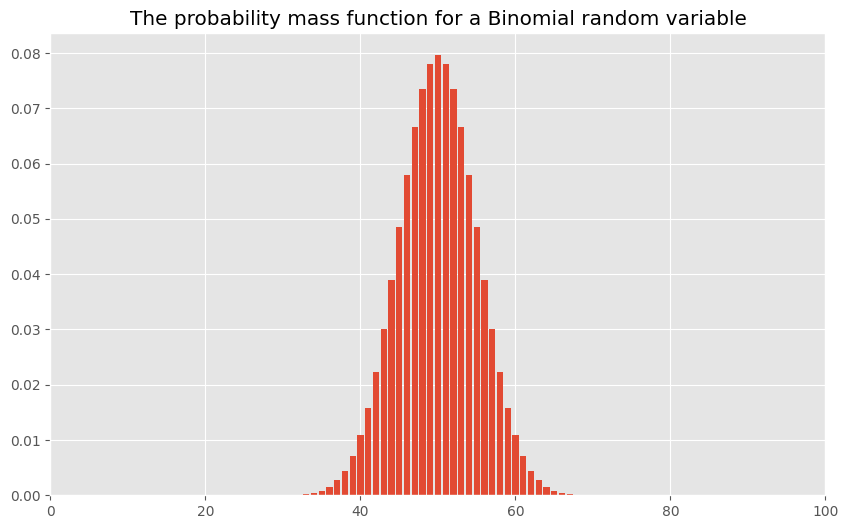

In [24]:
f = lambda k: binom.pmf(k, n=n,p=p)

x = np.arange(n+1);
plt.bar(x, f(x))
plt.title("The probability mass function for a Binomial random variable")
plt.xlim([0,n])
plt.show()

Observe that the probability mass function looks very much like the histogram plot! (not a coincidence) 

Question: is this a good way of visualizing a PMF?


## Concept check

**Question**: what is a discrete random variable? 

A *discrete random variable (r.v.)* is an abstraction of a coin or die. It can take on a *discrete* set of possible different values, each with a preassigned probability. We saw two examples of discrete random variables: Bernoulli and binomial.  A Bernoulli r.v. takes value $1$ with probability $p$ and $0$ with probability $1-p$. A binomial r.v. takes values $0,1,\ldots,n$, with a given probability. The probabilities are given by the probability mass function. This function looks just like a histogram if you were to sample a large number of random variables. 

You can use the same descriptive statistics to describe a discrete random value (min, max, mean, variance, etc..).

**Quiz**: what is the random variable that describes a fair die? the sum of two fair dice? 

## Normal (Gaussian) distribution 

Roughly speaking, normal (that's their name, we don't use normal as a synonym for typical) random variables are described by a "bell curve".  The curve is centered at the mean, $\mu$, and has width controlled by the standard deviation, $\sigma$. This is one of the most popular distributions in a huge variety of applications.  It has a simple formula which supports lots of algebraic/calculus manipulations, and is a good model for lots of real world phenomena.  It can be derived by looking at what happens when you add up many independent random variables (imagine a binomial distribution with very large n).

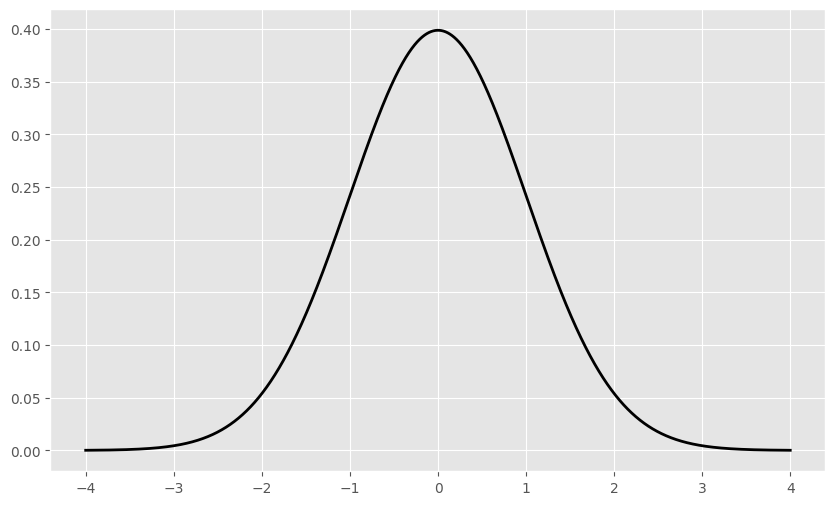

In [70]:
mu = 0 # mean
sigma = 1 # standard deviation 
x = np.arange(mu-4*sigma,mu+4*sigma,0.001);
pdf = norm.pdf(x,loc=mu, scale=sigma)
# Here, I could have also written
# pdf = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2)) 
plt.plot(x, pdf, linewidth=2, color='k')
plt.show()

## Continuous random variables and probability density functions 

A normal random variable is an example of a *continuous* random variable. A normal random variable can take any real value, but some numbers are more likely than others. More formally, we say that the *probability density function (PDF)* for the normal (Gaussian) distribution is
$$
f(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }}
e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} },
$$
where $\mu$ is the mean and $\sigma$ is the variance. What this means is that the probability that a normal random variable will take values in the interval $[a,b]$ is given by 
$$
\int_a^b f(x) dx.
$$
This is just the area under the curve for this interval. For $a=\mu-\sigma$ and $b = \mu+\sigma$, we plot this below.

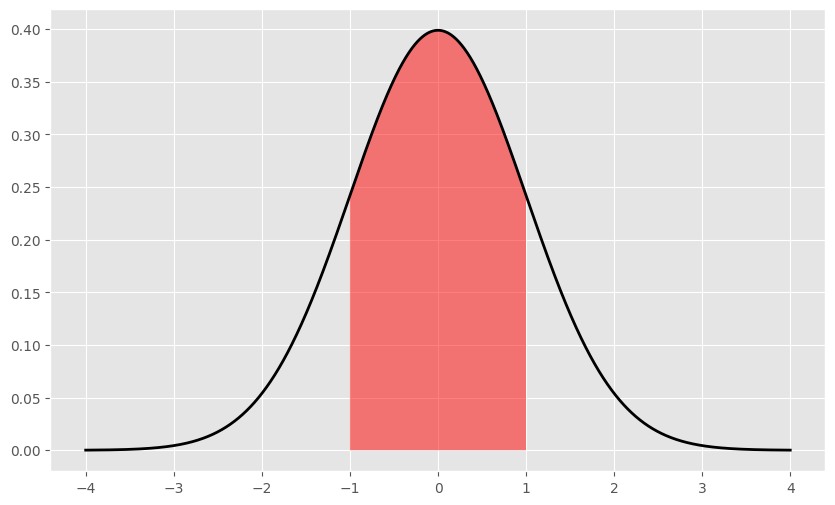

In [26]:
plt.plot(x, pdf, linewidth=2, color='k')
x2 = np.arange(mu-sigma,mu+sigma,0.001)
plt.fill_between(x2, y1= norm.pdf(x2,loc=mu, scale=sigma), facecolor='red', alpha=0.5)
plt.show()

One can check that 
$$
\int_{-\infty}^\infty f(x) dx = 1
$$
which just means that the probability that the random variable takes value between $-\infty$ and $\infty$ is one. 

This integral can be computed using the *cumulative distribution function* (CDF)
$$
F(x) = \int_{-\infty}^x f(x) dx.
$$
We have that 
$$
\int_a^b f(x) dx = F(b) - F(a)
$$


In [27]:
norm.cdf(mu+sigma, loc=mu, scale=sigma) - norm.cdf(mu-sigma, loc=mu, scale=sigma) 

0.6826894921370859

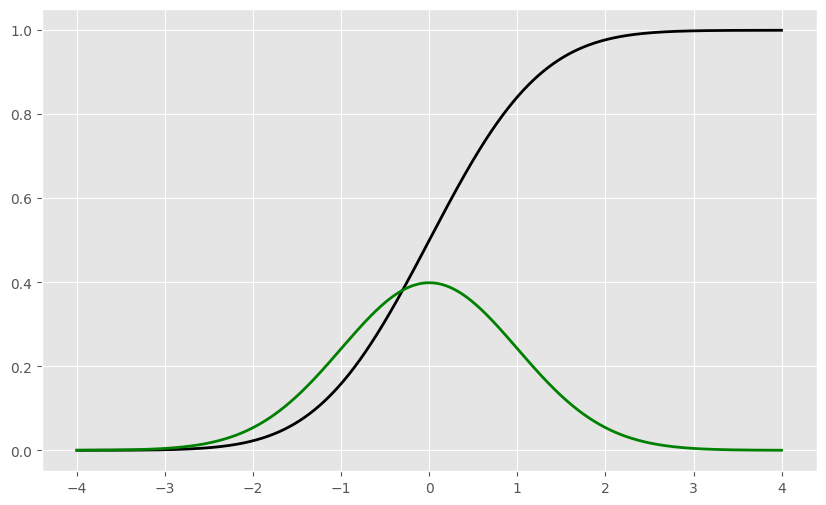

In [71]:
mu = 0 # mean
sigma = 1 # standard deviation 
x = np.arange(mu-4*sigma,mu+4*sigma,0.001);
cdf = norm.cdf(x,loc=mu, scale=sigma)
pdf = norm.pdf(x, loc=mu, scale=sigma)
# Here, I could have also written
# pdf = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2)) 
plt.plot(x, cdf, linewidth=2, color='k')
plt.plot(x, pdf, linewidth=2, color="g")
plt.show()

This means that 68% of the time, this normal random variable will have values between $\mu-\sigma$ and $\mu+\sigma$. 

You used to have to look these values up in a table! 

Let's see what it looks like if we sample 1,000,000 normal random variables and then plot a histogram. 

[-0.96113503  0.65639617  1.38565779 -0.2167966  -1.76166769 -2.28675877
 -1.35189563  0.79267601  0.1709383  -2.5967136  -0.31334583  0.4032572
  2.35999741  2.49608787  0.28343323  1.42123622  0.37690916 -1.49848282
  0.46464901 -1.73199516 -0.20315184  0.43326675 -0.58790997  2.05439401
 -0.80155609  0.04788356  0.85105781 -0.29538944 -0.81886975  0.11448342
  0.67715531 -0.63475639  0.60001068 -0.28673638 -1.69490283  0.5554692
  0.92893235  2.14958709  1.11806548  1.52217114 -0.61426206 -0.00739024
 -0.95993298  0.23842721 -0.50297993 -1.37642125 -0.91375082 -0.3177953
  0.15747335  0.37534984  0.43904861  1.13979034 -0.71108761  0.05152913
  0.84217012  0.2550509  -1.20228237 -0.10113771  1.32104574  0.7396173
  1.08819966 -0.37696664 -0.41713131 -0.35150093  0.43589164 -0.89474647
 -1.03369568 -1.26395756 -0.49457222  0.11500581  0.15183221  1.36942564
  0.20918355 -1.66383438 -1.71225985 -1.48631873 -1.78343379  1.49009666
 -0.30790338  1.92076388 -0.67475153  0.20625748  1.012

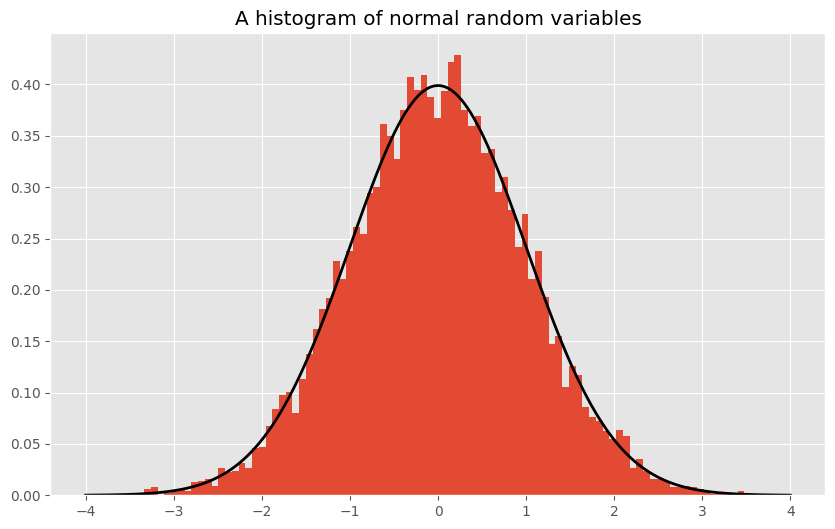

In [72]:
norm_vars = norm.rvs(loc=mu,scale=sigma,size=10000) 
#`norm`：来自 `scipy.stats`，代表标准正态分布。
# `.rvs(...)`：表示“random variates”，即生成随机样本。
#`loc=mu`：设置正态分布的均值为 `mu`。 mean
# `scale=sigma`：设置标准差为 `sigma`。
# `size=10000`：生成 10,000 个随机样本。
  
# **例子：** `mu = 0` 和 `sigma = 1` 就是标准正态分布。

print(norm_vars[:100])

plt.hist(norm_vars, bins=100,density=True)
plt.plot(x, pdf, linewidth=2, color='k')
plt.title("A histogram of normal random variables")
plt.show()

The histogram of the sampled variables looks just like the probability distribution function!

## The Poisson Distribution
The Poisson distribution takes the average rate of an event ocurring as a parameter ($\lambda$), and measures the probability of seeing $k$ of those events in an interval of time.  For example, if there are an average of 1.5 home runs per game in baseball, the poisson distribution tells you the probability of seeing 0, 1, 2, 3, ... homeruns in a given game.  

Note, this is a **discrete** rv, but it comes from a set of continuous parameters.  You can sort of think of it as a way to turn a continuous rate (1.5 homeruns per game) into the probability of a discrete set of outcomes.

For the baseball example, $\lambda = 1.5$ homers per game.  The probability of seeing $k$ homeruns is

$P(k)$ = Poission($k, \lambda$) = $e^{-\lambda}\frac{\lambda^k}{k!}$


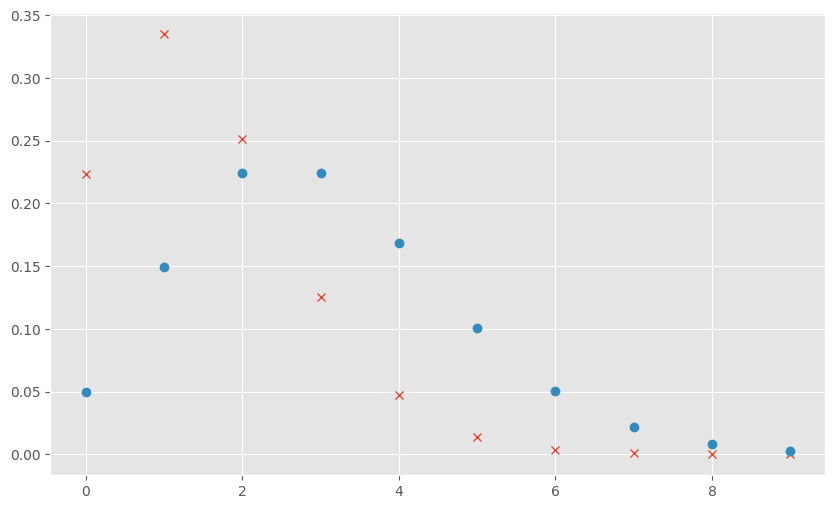

In [73]:
from scipy.stats import poisson
plt.plot(poisson.pmf(np.arange(10), mu=1.5), 'x') # 1.5 HR's per game
plt.plot(poisson.pmf(np.arange(10), mu=3), 'o') # 3 HR's per game



|        | Discrete           | Continuous  |
| ------------- |-------------| -----|
| comparing likelihood of outcome     | probability mass function.  p(outcome == possibility) | probability density function $$\int_a^b pdf(x) = $$ probability of outcome between a and b|
| cumulative likelihood: $$p(outcome <= somePossibility)$$| cumulative mass function:  $$\sum_{outcomes <= sumePossibility} \text{pmf}(outcome)$$ | cumulative density function: $$\int_{-\inf}^{outcome} \text{pdf}(x)$$ |


For both, probability of an outcome between 2 values is cmf/cdf(upper) - cmf/cdf(lower)


# Concept recap
- variable types 
- descriptive statistics in python (min, max, mean, median, std, var, histograms, quantiles) 
- correlation vs causation
- confounding variables 
- descriptive vs. inferential statistics
- discrete and continuous random variables (e.g.: Bernouilli, Binomial, Normal)


## Looking ahead:  Hypothesis testing